# <center> Trabajo 2 - Seminario de Ciencia de Datos.
Nombre: Juan Licanqueo

Use los datos de data_latam_032023.csv que están en el siguiente repositorio de dropbox:

https://www.dropbox.com/sh/mdoa0wmf3ao526u/AABXInn2Co1XTTF_BKpREsC9a?dl=0.
    
Se solicita realizar los siguientes puntos:
    
1. Elija una variable, y gráfique las series de tiempo de la variable para tres empresas diferentes del mismo rubro.
2. Elija una variable, y gráfique su serie de tiempo para empresas de diferente rubro.
3. Compare las densidades de la variable de la pregunta 1 para las empresas. ¿Qué gráfico refleja mejor la dinámica de las variables? 

### Importamos las librerías .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os 

### Definimos el directorio de trabajo.

In [2]:
#Utilizamos la librerís OS para definir nuestro directorio de trabajo.
os.chdir('/Users/Juan/Desktop/Seminario_Ciencia_Datos')
#------------------------------------------------------------------------------------------------------------------------------
#Verificamos si el directorio fue definido correctamente.
os.getcwd()

'C:\\Users\\Juan\\Desktop\\Seminario_Ciencia_Datos'

### Cargamos la base de datos directamente de dropbox.

In [316]:
#Generamos una variable para guardar el link donde esta ubicado la base de datos.
url = 'https://www.dropbox.com/sh/mdoa0wmf3ao526u/AACP03t0Q_D6yNeajQzhhjB9a/data_latam_032023.csv?dl=1'
#------------------------------------------------------------------------------------------------------------------------------
#Creamos el data frame con pandas.
data = pd.read_csv(url)
#------------------------------------------------------------------------------------------------------------------------------
#Visualizamos los 5 primeros registros.
data.head()

C:\Users\Juan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,nombre,tic_bolsa,tic,naic,year,quarter,date,Capex,Cash,ConsolNetInc,...,CurrLiab,DivPaid,MarketCapitaliz,NetIncome,PPENet,Revenues,StckhEq,TotalAssets,TotalLiability,pais
0,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2021.0,12.0,122021.0,NaN,28832.104,73164.253,...,75496.876,70973.872,780941.8755,73164.253,8290.403,163319.880,414857.775,557327.570,NaN,Chile
1,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2021.0,9.0,92021.0,NaN,67651.594,47593.581,...,47083.810,17973.846,780941.8755,47593.581,8867.496,120615.696,464280.280,576704.704,NaN,Chile
2,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2021.0,6.0,62021.0,NaN,56806.206,31845.381,...,41566.808,17973.846,780941.8755,31845.381,9287.605,79872.727,448551.559,556012.126,NaN,Chile
3,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2021.0,3.0,32021.0,NaN,34619.598,18921.993,...,62335.585,0.000,780941.8755,18921.993,9600.614,39917.322,435677.766,568099.668,NaN,Chile
4,A.F.P. Capital S.A.,AFPCAPITAL<XSGO>,AFPCAPITAL,Insurance and Employee Benefit Funds,2020.0,12.0,122020.0,NaN,66322.752,59912.751,...,122980.590,111143.647,780941.8755,59912.751,10265.233,149043.800,416763.980,611868.680,NaN,Chile


### Verificaremos como fueron cargados los tipos de variables.

In [356]:
#Utilizaremos el modulo info para ver cada tipo de variable que contine la base de datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528948 entries, 0 to 528947
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   nombre           528948 non-null  object        
 1   tic_bolsa        528948 non-null  object        
 2   tic              528948 non-null  object        
 3   naic             528948 non-null  object        
 4   year             109872 non-null  float64       
 5   quarter          109872 non-null  float64       
 6   date             109872 non-null  datetime64[ns]
 7   Capex            68039 non-null   float64       
 8   Cash             84685 non-null   float64       
 9   ConsolNetInc     101075 non-null  float64       
 10  CurrAssets       100905 non-null  float64       
 11  CurrLiab         100932 non-null  float64       
 12  DivPaid          69722 non-null   float64       
 13  MarketCapitaliz  37918 non-null   float64       
 14  NetIncome        104

#### <center>De la información entregada podemos observar que la variable "date" es de tipo numérico con decimales y además contiene valores nan, por lo cuál debemos convertir esta variable a tipo fecha.

### A continuación pasaremos la variable "date" a tipo fecha con datetime.

In [320]:
#Primero reemplazaremos los valores na con 0, luego eliminaremos los decimales y transformaremos en entero, finalmente lo 
#convertiremos en una cadena de texto.
data.date = data.date.fillna(0).round().astype(int).astype(str)
#------------------------------------------------------------------------------------------------------------------------------
#Ahora transformaremos la variable a tipo fecha usando solo el mes y el año, de forma automática se le asignará el día 1 a
#todas las fechas y para evitar errores usaremos "coerce" para dejar los valores de 0 como NaT
data.date = pd.to_datetime(data.date, format = '%m%Y', errors = 'coerce')
#------------------------------------------------------------------------------------------------------------------------------
#Finalmente visualizaremos la transformación de las fechas a tipo datetime
print(data.date.unique())

['2021-12-01T00:00:00.000000000' '2021-09-01T00:00:00.000000000'
 '2021-06-01T00:00:00.000000000' '2021-03-01T00:00:00.000000000'
 '2020-12-01T00:00:00.000000000' '2020-09-01T00:00:00.000000000'
 '2020-06-01T00:00:00.000000000' '2020-03-01T00:00:00.000000000'
 '2019-12-01T00:00:00.000000000' '2019-09-01T00:00:00.000000000'
 '2019-06-01T00:00:00.000000000' '2019-03-01T00:00:00.000000000'
 '2018-12-01T00:00:00.000000000' '2018-09-01T00:00:00.000000000'
 '2018-06-01T00:00:00.000000000' '2018-03-01T00:00:00.000000000'
 '2017-12-01T00:00:00.000000000' '2017-09-01T00:00:00.000000000'
 '2017-06-01T00:00:00.000000000' '2017-03-01T00:00:00.000000000'
 '2016-12-01T00:00:00.000000000' '2016-09-01T00:00:00.000000000'
 '2016-06-01T00:00:00.000000000' '2016-03-01T00:00:00.000000000'
 '2015-12-01T00:00:00.000000000' '2015-09-01T00:00:00.000000000'
 '2015-06-01T00:00:00.000000000' '2015-03-01T00:00:00.000000000'
 '2014-12-01T00:00:00.000000000' '2014-09-01T00:00:00.000000000'
 '2014-06-01T00:00:00.000

### Ahora seleccionaremos el rubro de un subconjunto de registros de la variable "naic".

In [357]:
#Visualizaremos los 10 primeros registros únicos de la variable "naic" para seleccionar el rubro.
selec_rubros = data.naic.unique()[:10]
print('\nDe este conjunto de rubros seleccionaremos uno:', '\n', list(selec_rubros))
#------------------------------------------------------------------------------------------------------------------------------
#Ahora seleccionaremos tres empresas. 
rubro = selec_rubros[6]
print('\nEl rubro seleccionado es:', '\n', rubro)


De este conjunto de rubros seleccionaremos uno: 
 ['Insurance and Employee Benefit Funds', 'Traveler Accommodation', 'Miscellaneous Durable Goods Merchant Wholesalers', 'Nondepository Credit Intermediation', 'Other Investment Pools and Funds', '-', 'Electric Power Generation, Transmission and Distribution', 'Deep Sea, Coastal, and Great Lakes Water Transportation', 'Oilseed and Grain Farming', 'Support Activities for Crop Production']

El rubro seleccionado es: 
 Electric Power Generation, Transmission and Distribution


### En este paso seleccionaremos las tres empresas para el análisis que realizaremos.

In [358]:
#Primero visualizaremos las 10 primeras empresas.
empresas = data[data.naic == rubro].loc[:,'nombre'].unique()[:10]
print('\nLas 10 primeras empresas de las cuales elegiremos 3 son:','\n', list(empresas))
#------------------------------------------------------------------------------------------------------------------------------
#Ahora seleccionaremos tres empresas. 
seleccion = empresas[3:6]
print('\nLas empresas seleccionadas son:', '\n',seleccion[0], '\n', seleccion[1], '\n', seleccion[2])


Las 10 primeras empresas de las cuales elegiremos 3 son: 
 ['Aes Andes S.A.', 'Celeo Redes Operacion Chile S.A.', 'Cge Transmision S.A.', 'Chilquinta Energia S.A.', 'Colbun S.A.', 'Compañia Electrica Del Litoral S.A.', 'Compañia General De Electricidad S.A.', 'Electrica Puntilla S.A.', 'Empresa Electrica Cochrane Spa', 'Empresa Electrica De La Frontera S.A.']

Las empresas seleccionadas son: 
 Chilquinta Energia S.A. 
 Colbun S.A. 
 Compañia Electrica Del Litoral S.A.


### Pasaremos a filtrar la base de datos por el rubro y las empresas seleccionadas, también la ordenaremos por fecha..

In [374]:
#------------------------------------------------------------------------------------------------------------------------------
#Primer filtro
#------------------------------------------------------------------------------------------------------------------------------
#Filtraremos la base de datos para que se cumplan 2 condiciones en forma simultánea que son el rubro y la empresa.
Chilquinta = data[(data.naic == rubro) & (data.nombre == seleccion[0])].sort_values('date')
#------------------------------------------------------------------------------------------------------------------------------
#Ahora verificaremos que la base se haya filtrado con las condiciones que solicitamos.
print('\nChilquinta es el filtro de la base de datos donde se cumplen las siguientes condiciones:', 
      '\n- EL rubro es', Chilquinta.naic.unique()[0],
      '\n- Y el nombre de la empresa es', Chilquinta.nombre.unique()[0])
#------------------------------------------------------------------------------------------------------------------------------
#Segundo filtro
#------------------------------------------------------------------------------------------------------------------------------
#Filtraremos la base de datos para que se cumplan 2 condiciones en forma simultánea que son el rubro y la empresa.
Colbun = data[(data.naic == rubro) & (data.nombre == seleccion[1])].sort_values('date')
#------------------------------------------------------------------------------------------------------------------------------
#Ahora verificaremos que la base se haya filtrado con las condiciones que solicitamos.
print('\nColbun es el filtro de la base de datos donde se cumplen las siguientes condiciones:', 
      '\n- EL rubro es', Colbun.naic.unique()[0],
      '\n- Y el nombre de la empresa es', Colbun.nombre.unique()[0])
#------------------------------------------------------------------------------------------------------------------------------
#Segundo filtro
#------------------------------------------------------------------------------------------------------------------------------
#Filtraremos la base de datos para que se cumplan 2 condiciones en forma simultánea que son el rubro y la empresa.
Litoral = data[(data.naic == rubro) & (data.nombre == seleccion[2])].sort_values('date')
#------------------------------------------------------------------------------------------------------------------------------
#Ahora verificaremos que la base se haya filtrado con las condiciones que solicitamos.
print('\nLitoral es el filtro de la base de datos donde se cumplen las siguientes condiciones:', 
      '\n- EL rubro es', Litoral.naic.unique()[0],
      '\n- Y el nombre de la empresa es', Litoral.nombre.unique()[0])


Chilquinta es el filtro de la base de datos donde se cumplen las siguientes condiciones: 
- EL rubro es Electric Power Generation, Transmission and Distribution 
- Y el nombre de la empresa es Chilquinta Energia S.A.

Colbun es el filtro de la base de datos donde se cumplen las siguientes condiciones: 
- EL rubro es Electric Power Generation, Transmission and Distribution 
- Y el nombre de la empresa es Colbun S.A.

Litoral es el filtro de la base de datos donde se cumplen las siguientes condiciones: 
- EL rubro es Electric Power Generation, Transmission and Distribution 
- Y el nombre de la empresa es Compañia Electrica Del Litoral S.A.


### Graficaremos las series de tiempo de los conjuntos creados por la variable "ingresos netos".

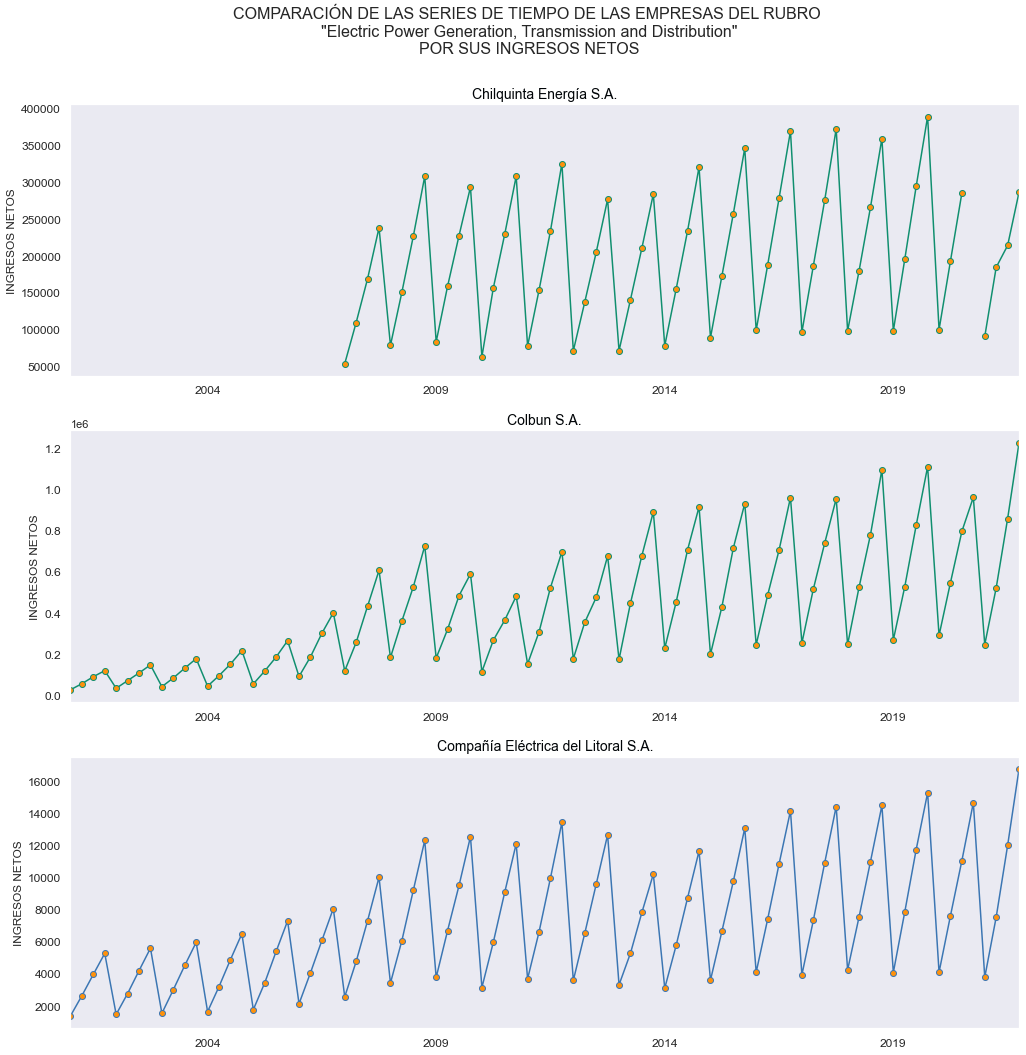

In [382]:
fig, axes = plt.subplots(3,1, figsize = (17,17))

fig.suptitle('COMPARACIÓN DE LAS SERIES DE TIEMPO DE LAS EMPRESAS DEL RUBRO \n"Electric Power Generation, Transmission and Distribution"\nPOR SUS INGRESOS NETOS',
            fontsize = 16,
            y = 0.96)

sns.set_theme(style="dark")

# ---------------------------------------------------------------------------------------------
# Chilquinta Energía S.A.
# ---------------------------------------------------------------------------------------------

Chilquinta.plot('date', 
              'Revenues',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#108F6F',
               legend = None,
               fontsize = 12,
               ax = axes[0]
              )
axes[0].set_title('Chilquinta Energía S.A.',
          color = '#000407',
          fontsize = 14,
          loc = 'center'
         )

axes[0].set_xlabel(None)

axes[0].set_ylabel('INGRESOS NETOS',
                     fontsize = 11.8
                     )

# ---------------------------------------------------------------------------------------------
# Colbun S.A.
# ---------------------------------------------------------------------------------------------

Colbun.plot('date', 
              'Revenues',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#108F6F',
               legend = None,
               fontsize = 12,
               ax = axes[1]
              )

axes[1].set_title('Colbun S.A.',
          color = '#000407',
          fontsize = 14,
          loc = 'center',
         )
axes[1].set_xlabel(None)

axes[1].set_ylabel('INGRESOS NETOS',
                     fontsize = 11.8
                     )

# ---------------------------------------------------------------------------------------------
# Compañía Eléctrica del Litoral S.A.
# ---------------------------------------------------------------------------------------------

Litoral.plot('date', 
              'Revenues',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#3B76B3',
               legend = None,
               fontsize = 12,
               ax = axes[2]
              )

axes[2].set_title('Compañía Eléctrica del Litoral S.A.',
          color = '#000407',
          fontsize = 14,
          loc = 'center',
         )

axes[2].set_xlabel(None)

axes[2].set_ylabel('INGRESOS NETOS',
                     fontsize = 11.8
                     )


plt.show()

### <center> De las series de tiempo por ingresos neto podemos inferir lo siguiente:
 * #### Para las tres empresas el comportamiento temporal es similar.
 * #### La empresa que alcanza mayor ingreso y su tendencia es creciente es Colbun S.A.
 * #### Chilquinta alcanza mayores ingresos que Litoral, pero su gráfica empieza del 2007.
 * #### Colbun y Litoral su serie empieza desde el 2001.
 * #### La tendencia de Litoral es creciente, pero no es tan notorio y Chilquinta es más constante.

### Ahora seleccionaremos tres empresas de diferentes rubros.

In [303]:
#Visualizaremos los 10 primeros registros únicos de la variable "naic" para seleccionar el rubro.
rubros = data.naic.unique()[:10]
print('\nLos 10 primeros rubros son:', '\n', list(rubros))
#------------------------------------------------------------------------------------------------------------------------------      
#Ahora seleccionaremos tres rubros. 
rub_selec = list(rubros[0:3])
print('\nLas rubros seleccionados son:', '\n', rub_selec[0], '\n', rub_selec[1], '\n', rub_selec[2])


Los 10 primeros rubros son: 
 ['Insurance and Employee Benefit Funds', 'Traveler Accommodation', 'Miscellaneous Durable Goods Merchant Wholesalers', 'Nondepository Credit Intermediation', 'Other Investment Pools and Funds', '-', 'Electric Power Generation, Transmission and Distribution', 'Deep Sea, Coastal, and Great Lakes Water Transportation', 'Oilseed and Grain Farming', 'Support Activities for Crop Production']

Las rubros seleccionados son: 
 Insurance and Employee Benefit Funds 
 Traveler Accommodation 
 Miscellaneous Durable Goods Merchant Wholesalers


### A continuación seleccionaremos una empresa por cada rubro.

In [350]:
#La primera empresa seleccionada será del rubro "Insurance and Employee Benefit Funds".
emp_01 = data[data.naic == rub_selec[0]].nombre.unique()[0]
print('\nLa primera empresa seleccionada es:', emp_01,'del rubro', rub_selec[0])
#------------------------------------------------------------------------------------------------------------------------------
#La segunda empresa seleccionada será del rubro "Traveler Accommodation".
emp_02 = data[data.naic == rub_selec[1]].nombre.unique()[0]
print('\nLa segunda empresa seleccionada es:', emp_02, 'del rubro', rub_selec[1])
#------------------------------------------------------------------------------------------------------------------------------
#La tercera empresa seleccionada será del rubro "Miscellaneous Durable Goods Merchant Wholesalers".
emp_03 = data[data.naic == rub_selec[2]].nombre.unique()[0]
print('\nLa tercera empresa seleccionada es:', emp_03, 'del rubro', rub_selec[2])


La primera empresa seleccionada es: A.F.P. Capital S.A. del rubro Insurance and Employee Benefit Funds

La segunda empresa seleccionada es: A3 Property Investments Spa del rubro Traveler Accommodation

La tercera empresa seleccionada es: Ad Retail S.A. del rubro Miscellaneous Durable Goods Merchant Wholesalers


### Pasaremos a filtrar la base de datos por cada rubro y empresa seleccionada, también la ordenaremos por fecha.

In [344]:
#------------------------------------------------------------------------------------------------------------------------------
#Primer filtro
#------------------------------------------------------------------------------------------------------------------------------
#Filtraremos la base de datos para que se cumplan 2 condiciones en forma simultánea que son el rubro y la empresa.
Emp01_Fil = data[(data.naic == rub_selec[0]) & (data.nombre == emp_01)].sort_values('date')
#------------------------------------------------------------------------------------------------------------------------------
#Ahora verificaremos que la base se haya filtrado con las condiciones que solicitamos.
print('\nEmp01_Fil es el filtro de la base de datos donde se cumplen las siguientes condiciones:', 
      '\n- EL rubro es', Emp01_Fil.naic.unique()[0], 
      '\n- Y el nombre de la empresa es', Emp01_Fil.nombre.unique()[0])
#------------------------------------------------------------------------------------------------------------------------------
#Segundo filtro
#------------------------------------------------------------------------------------------------------------------------------
#Filtraremos la base de datos para que se cumplan 2 condiciones en forma simultánea que son el rubro y la empresa.
Emp02_Fil = data[(data.naic == rub_selec[1]) & (data.nombre == emp_02)].sort_values('date')
#------------------------------------------------------------------------------------------------------------------------------
#Ahora verificaremos que la base se haya filtrado con las condiciones que solicitamos.
print('\nEmp02_Fil es el filtro de la base de datos donde se cumplen las siguientes condiciones:', 
      '\n- EL rubro es', Emp02_Fil.naic.unique()[0], 
      '\n- Y el nombre de la empresa es', Emp02_Fil.nombre.unique()[0])
#------------------------------------------------------------------------------------------------------------------------------
#Tercer filtro
#------------------------------------------------------------------------------------------------------------------------------
#Filtraremos la base de datos para que se cumplan 2 condiciones en forma simultánea que son el rubro y la empresa.
Emp03_Fil = data[(data.naic == rub_selec[2]) & (data.nombre == emp_03)].sort_values('date')
#------------------------------------------------------------------------------------------------------------------------------
#Ahora verificaremos que la base se haya filtrado con las condiciones que solicitamos.
print('\nEmp03_Fil es el filtro de la base de datos donde se cumplen las siguientes condiciones:', 
      '\n- EL rubro es', Emp03_Fil.naic.unique()[0], 
      '\n- Y el nombre de la empresa es', Emp03_Fil.nombre.unique()[0])


Emp01_Fil es el filtro de la base de datos donde se cumplen las siguientes condiciones: 
- EL rubro es Insurance and Employee Benefit Funds 
- Y el nombre de la empresa es A.F.P. Capital S.A.

Emp02_Fil es el filtro de la base de datos donde se cumplen las siguientes condiciones: 
- EL rubro es Traveler Accommodation 
- Y el nombre de la empresa es A3 Property Investments Spa

Emp03_Fil es el filtro de la base de datos donde se cumplen las siguientes condiciones: 
- EL rubro es Miscellaneous Durable Goods Merchant Wholesalers 
- Y el nombre de la empresa es Ad Retail S.A.


### Graficaremos las series de tiempo de los conjuntos creados por la variable "Activo Total".

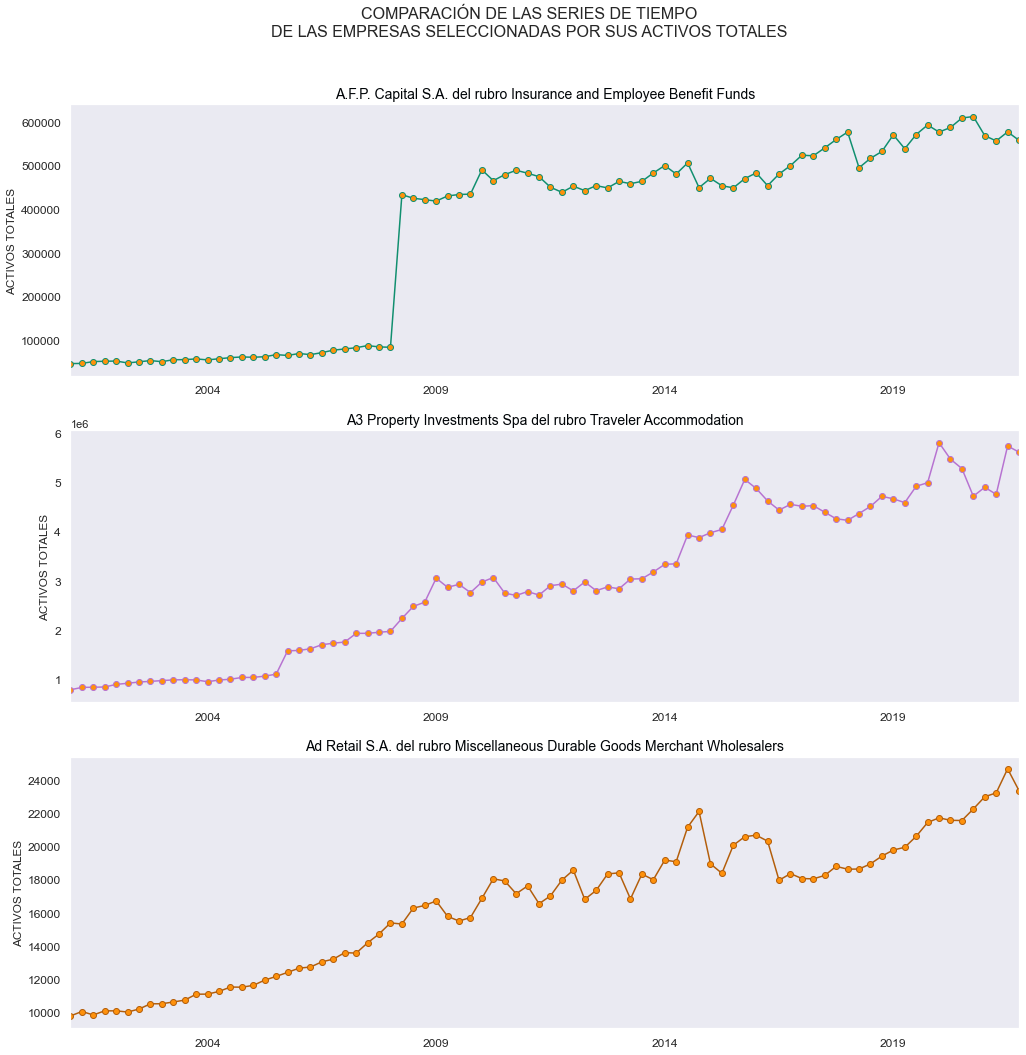

In [411]:
fig, axes = plt.subplots(3,1, figsize = (17,17))

fig.suptitle('COMPARACIÓN DE LAS SERIES DE TIEMPO\nDE LAS EMPRESAS SELECCIONADAS POR SUS ACTIVOS TOTALES',
            fontsize = 16,
            y = 0.96)

sns.set_theme(style="dark")

# ---------------------------------------------------------------------------------------------
# A.F.P. Capital S.A. del rubro Insurance and Employee Benefit Funds
# ---------------------------------------------------------------------------------------------

Emp01_Fil.plot('date', 
              'TotalAssets',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#108F6F',
               legend = None,
               fontsize = 12,
               ax = axes[0]
              )
axes[0].set_title('A.F.P. Capital S.A. del rubro Insurance and Employee Benefit Funds',
          color = '#000407',
          fontsize = 14,
          loc = 'center'
         )

axes[0].set_xlabel(None)

axes[0].set_ylabel('ACTIVOS TOTALES',
                     fontsize = 11.8
                     )

# ---------------------------------------------------------------------------------------------
# Colbun S.A.
# ---------------------------------------------------------------------------------------------

Colbun.plot('date', 
              'TotalAssets',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#B773D1',
               legend = None,
               fontsize = 12,
               ax = axes[1]
              )

axes[1].set_title('A3 Property Investments Spa del rubro Traveler Accommodation',
          color = '#000407',
          fontsize = 14,
          loc = 'center',
         )
axes[1].set_xlabel(None)

axes[1].set_ylabel('ACTIVOS TOTALES',
                     fontsize = 11.8
                     )

# ---------------------------------------------------------------------------------------------
# Compañía Eléctrica del Litoral S.A.
# ---------------------------------------------------------------------------------------------

Litoral.plot('date', 
              'TotalAssets',  
               marker = 'o',
               markerfacecolor = '#FF910B',
               markersize = 6,
               color = '#B35E0B',
               legend = None,
               fontsize = 12,
               ax = axes[2]
              )

axes[2].set_title('Ad Retail S.A. del rubro Miscellaneous Durable Goods Merchant Wholesalers',
          color = '#000407',
          fontsize = 14,
          loc = 'center',
         )

axes[2].set_xlabel(None)

axes[2].set_ylabel('ACTIVOS TOTALES',
                     fontsize = 11.8
                     )


plt.show()

### <center> De las series de tiempo por Activos Totales podemos inferir lo siguiente:
 * #### Para las tres empresas el comportamiento temporal es similar.
 * #### La empresa que alcanza mayor ingreso A3 Property Investments Spa del rubro Traveler Accommodation.
 * #### A.F.P. Capital S.A. del rubro Insurance and Employee Benefit Funds alcanza mayores ingresos que Ad Retail S.A. del rubro Miscellaneous Durable Goods Merchant Wholesalers.
 * #### La tendencia de todas es creciente, en AFP Capital hay un pick muy grande durante el año 2008.

### Graficaremos las funciones de densidad de las empresas del rubro Electric Power Generation, Transmission and Distribution.

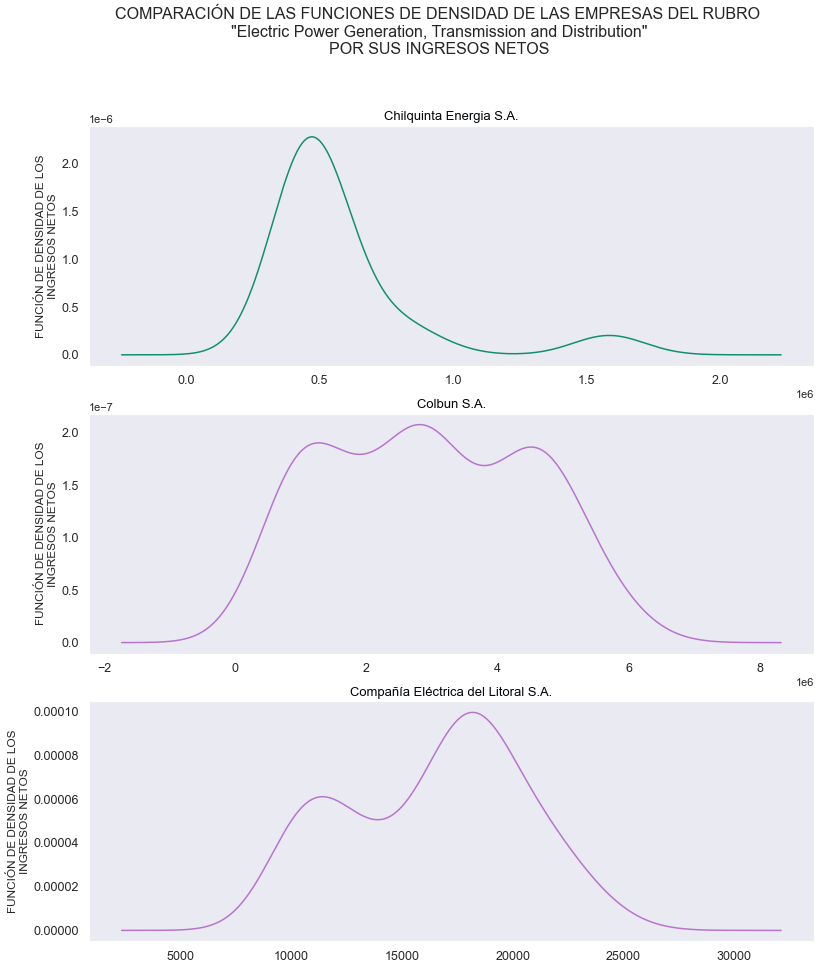

In [419]:
# Configuramos el tema 
sns.set_theme(style="dark")
#------------------------------------------------------------------------------------------------------------------------------
# Crearemos la plantilla y los subplots
fig, axs = plt.subplots(3, 1, figsize=(13, 15))
#------------------------------------------------------------------------------------------------------------------------------
# Configuramos el título principal
fig.suptitle('COMPARACIÓN DE LAS FUNCIONES DE DENSIDAD DE LAS EMPRESAS DEL RUBRO \n"Electric Power Generation, Transmission and Distribution"\nPOR SUS INGRESOS NETOS',
            fontsize = 16,
            y = 0.99,
            ha = 'center')

# ---------------------------------------------------------------------------------------------
# Chilquinta Energía S.A.
# ---------------------------------------------------------------------------------------------
plt.subplot(3, 1, 1)

Chilquinta.TotalAssets.plot(kind='density',
                            color='#108F6F',
                            fontsize=12.5)

plt.title('Chilquinta Energia S.A.',
          color='#000407',
          fontsize=13,
          loc='center')

plt.ylabel('FUNCIÓN DE DENSIDAD DE LOS\nINGRESOS NETOS',
           fontsize=11.8)
# ---------------------------------------------------------------------------------------------
# Colbun S.A.
# ---------------------------------------------------------------------------------------------
plt.subplot(3, 1, 2)

Colbun.TotalAssets.plot(kind='density',
                        color='#B773D1',
                        fontsize=12.5)

plt.title('Colbun S.A.',
          color='#000407',
          fontsize=13,
          loc='center')

plt.ylabel('FUNCIÓN DE DENSIDAD DE LOS\nINGRESOS NETOS',
           fontsize=11.8)
# ---------------------------------------------------------------------------------------------
# Compañía Eléctrica del Litoral S.A.
# ---------------------------------------------------------------------------------------------
plt.subplot(3, 1, 3)

Litoral.TotalAssets.plot(kind='density',
                         color='#B773D1',
                         fontsize=12.5)

plt.title('Compañía Eléctrica del Litoral S.A.',
          color='#000407',
          fontsize=13,
          loc='center')

plt.ylabel('FUNCIÓN DE DENSIDAD DE LOS\nINGRESOS NETOS',
           fontsize=11.8)

plt.show()

### <center> De los gráficos de densidad de los ingresos netos podemos inferir lo siguiente:
 * #### Colbun S.A. es el más centrado donde se observan 3 picks.
 * #### Compañía Eléctrica del Litoral S.A. también presenta función centrada con 2 picks.
 * #### Chilquinta Energia S.A. es el menos centrado, obervamos que su gráfica se carga hacia el 0.